<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [1]:
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
import seaborn               as sns
#import pandas as pd

from scipy import stats
import sklearn.metrics       as Metrics
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
df_std = df.iloc[8000000:,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
8000000,1.0,2406953.0,779157.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,G,F,...,1,201902,0,0.0,2,5954000.0,0.0,PEDRAZA,47,3.663700e+05
8000001,1.0,3014036.0,0.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,D,F,...,1,202001,0,0.0,1,7480000.0,0.0,PEDRAZA,48,7.372630e+05
8000002,2.0,1242174.0,0.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,D,F,...,5,202009,1,4000000.0,9,5356000.0,0.0,PEDRAZA,48,4.473640e+05
8000003,1.0,2851369.0,741967.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,E,F,...,1,201908,0,0.0,8,6692000.0,0.0,PEDRAZA,47,4.797520e+05
8000004,1.0,3171369.0,0.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,D,F,...,1,201911,0,0.0,11,8552000.0,0.0,PEDRAZA,48,1.599610e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


## One-Hot Encoding

In [7]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [8]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YAMUESQUER,ciudad_residencia_YARIMA,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
8000000,1.0,2406953.0,779157.0,6,1,1,2,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8000001,1.0,3014036.0,0.0,6,1,1,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8000002,2.0,1242174.0,0.0,6,1,1,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8000003,1.0,2851369.0,741967.0,6,1,1,4,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8000004,1.0,3171369.0,0.0,6,1,1,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527189,3.0,26913722.0,14956096.0,6,1,1,5,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527190,3.0,16301000.0,0.0,8,1,1,3,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527191,2.0,14481371.0,11916465.0,6,1,1,7,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    1527193
dtype: int64

## Best Variables

In [10]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:16]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'periodo',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_BACTERIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL']

In [11]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'periodo',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_BACTERIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
                     'gasto_familiar']

In [12]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,profesion_tag_gasto_familiar,ctas_activas,periodo,profesion_AUXILIAR DE ODONTOLOGIA,profesion_BACTERIOLOGIA,profesion_CARRERA MILITAR,profesion_COMERCIO INTERNACIONAL,gasto_familiar
8000000,1.0,2406953.0,779157.0,6,1,1,2,1,1.0,44,2,201902,0,0,0,0,3.663700e+05
8000001,1.0,3014036.0,0.0,6,1,1,3,1,1.0,44,2,202001,0,0,0,0,7.372630e+05
8000002,2.0,1242174.0,0.0,6,1,1,3,1,1.0,44,2,202009,0,0,0,0,4.473640e+05
8000003,1.0,2851369.0,741967.0,6,1,1,4,1,1.0,44,2,201908,0,0,0,0,4.797520e+05
8000004,1.0,3171369.0,0.0,6,1,1,3,1,1.0,44,2,201911,0,0,0,0,1.599610e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,6,1,1,8,1,1.0,44,1,202011,0,0,0,0,7.431714e+05
9527189,3.0,26913722.0,14956096.0,6,1,1,5,2,3.0,47,2,202011,0,0,1,0,8.502165e+05
9527190,3.0,16301000.0,0.0,8,1,1,3,2,3.0,46,1,202011,0,0,0,0,7.853290e+05
9527191,2.0,14481371.0,11916465.0,6,1,1,7,1,5.0,64,1,202011,0,0,0,0,1.029045e+06


## Normalization

In [13]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,1527193.0,0.31,0.14,0.0,0.20,0.20,0.40,1.0
1,1527193.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
2,1527193.0,0.00,0.01,0.0,0.00,0.00,0.01,1.0
3,1527193.0,0.54,0.17,0.0,0.56,0.56,0.56,1.0
4,1527193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,1527193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,1527193.0,0.61,0.36,0.0,0.29,0.71,1.00,1.0
7,1527193.0,0.49,0.50,0.0,0.00,0.00,1.00,1.0
8,1527193.0,0.46,0.46,0.0,0.00,0.50,1.00,1.0
9,1527193.0,0.58,0.21,0.0,0.55,0.55,0.69,1.0


In [14]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [15]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 16)
(281666,)
(1245527,)


## Train_Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
567982,0.2,0.000394,0.000000,0.555556,0.0,0.0,0.857143,1.0,0.0,0.102564,0.071429,0.045872,0.0,0.0,0.0,0.0
492075,0.6,0.009749,0.025212,0.555556,0.0,0.0,1.000000,1.0,1.0,0.551282,0.142857,0.917431,0.0,0.0,0.0,0.0
677858,0.2,0.000420,0.000000,0.555556,0.0,0.0,1.000000,1.0,0.0,0.858974,0.071429,0.908257,0.0,0.0,0.0,0.0
1060780,0.4,0.000465,0.000000,0.555556,0.0,0.0,1.000000,1.0,0.0,0.679487,0.071429,0.981651,0.0,0.0,0.0,0.0
195966,0.2,0.000378,0.000000,0.555556,0.0,0.0,1.000000,1.0,0.0,0.551282,0.071429,0.073394,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774926,0.2,0.000750,0.000000,0.777778,0.0,0.0,0.000000,0.0,1.0,0.551282,0.071429,0.009174,0.0,0.0,0.0,0.0
163639,0.2,0.000170,0.000000,0.555556,0.0,0.0,1.000000,1.0,0.0,0.974359,0.071429,0.935780,0.0,0.0,0.0,0.0
1025407,0.2,0.000267,0.004868,0.555556,0.0,0.0,0.714286,1.0,0.0,0.551282,0.071429,0.917431,0.0,0.0,0.0,0.0
170557,0.4,0.000427,0.000000,0.555556,0.0,0.0,0.428571,1.0,0.0,0.653846,0.071429,0.990826,0.0,0.0,0.0,0.0


In [17]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Decision Tree

In [18]:
dtree = DecisionTreeRegressor(criterion='mse',
                               max_depth=17
                               )
dtree.fit(X_train, y_train)
y_hat_dt = dtree.predict(X_test)
print("mae for Decision Tree on CV data: ",mean_absolute_error(y_test,y_hat_dt))
print("R2 Score for Decision Tree on CV data: ",r2_score(y_test,y_hat_dt))

mae for Decision Tree on CV data:  0.0010892380803290424
R2 Score for Decision Tree on CV data:  -0.19624555247288722


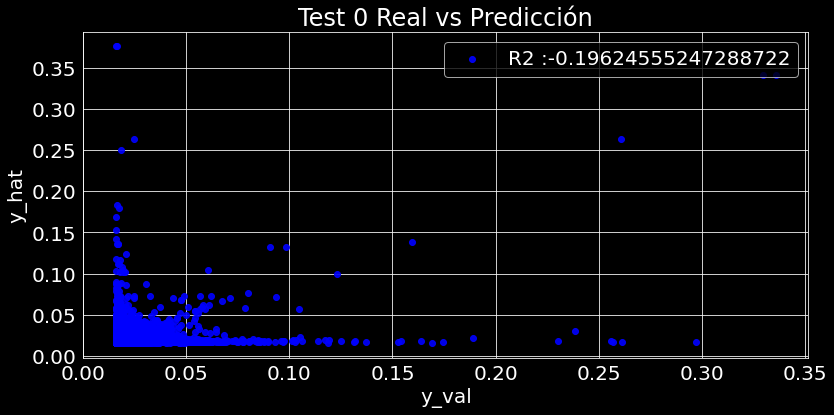

In [20]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat_dt),
                x=pd.DataFrame(y_test),
           color = 'blue',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_test),
                                pd.DataFrame(y_hat_dt))))],
           loc='upper right',
           )
plt.show()

# Extra Tree


In [21]:
et = ExtraTreesRegressor(n_jobs=-1,
                        criterion='mse',
                        max_features='sqrt',
                        n_estimators=80,
                        max_depth=10,
                         min_samples_split=10,
                         min_samples_leaf=10)

In [22]:
et.fit(X_train, y_train)
y_hat_et = et.predict(X_test)
print("mae for Extra tree on CV data: ",mean_absolute_error(y_test,y_hat_et))
print("R2 Score for Extra tree on CV data: ",r2_score(y_test,y_hat_et))

mae for Extra tree on CV data:  0.0010697138364726155
R2 Score for Extra tree on CV data:  0.07395223018540054


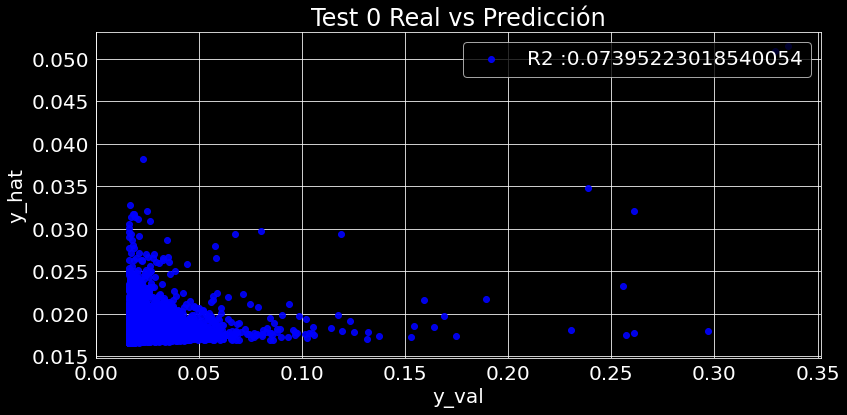

In [24]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat_et),
                x=pd.DataFrame(y_test),
           color = 'blue',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_test),
                                pd.DataFrame(y_hat_et))))],
           loc='upper right',
           )
plt.show()

# Random Forest

In [25]:
rf =RandomForestRegressor(random_state=42,
                            max_features='auto',
                            n_estimators= 10,
                            max_depth=5,
                            criterion='mae',
                            n_jobs=-1)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_hat_rf = rf.predict(X_test)
print("mae for Random Forest on CV data: ",mean_absolute_error(y_test,y_hat_rf))
print("Determination coeficient for Random Forest on CV data: ",r2_score(y_test,y_hat_rf))

In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat_rf),
                x=pd.DataFrame(y_test),
           color = 'blue',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_test),
                                pd.DataFrame(y_hat_rf))))],
           loc='upper right',
           )
plt.show()

# Assessment

In [ ]:
model_names={'Decision Tree':y_hat_dt,
            'Estra tree':y_hat_et,
            'Random Forest':y_hat_rf}

#sns.set_style('darkgrid')
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='y', label='Guess Randomly AUC = 0.5', alpha=.8)
for name in model_names:

    fpr, tpr, _ = Metrics.roc_curve(y_test, model_names[name])
    auc=Metrics.auc(fpr, tpr)
    
    # Display plot for ROC curve
    ax.plot(fpr,tpr,label=name+" AUC = %s " % str(auc))
    plt.legend(loc=4)
    plt.title("ROC Curves")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
plt.show()

# Submission

In [ ]:
#y_hat = Dtree.predict(x_val)
#y_hat = et.predict(x_val)
#y_hat = rf.predict(x_val)
y_hat

In [ ]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

In [ ]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

#  Muestras

Depende de los sub que ya esten guardado en la carpeta, para no sobre escribirlos

In [ ]:
#n = 5
n

In [ ]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

In [ ]:
n = n+1
sub_name = "/mnt/workstation/data/Alomarrano/Sub/Treebase{}.csv".format(n)
sub_name

In [ ]:
np.mean(sub['gasto_familiar'])

In [ ]:
sub.to_csv(sub_name, index=False)